# Finding the roots of an equation

## Motivation

We will find equations everywhere, and most of the time solving them will imply finding their roots:

$$f(x) = 0 $$

We will need approximate, numerical, methods when their roots are not analytically accessible. Consider, for example:

$$f(x) = e^{-x} -x$$

# The Bisection Method

Based on Bolzano's theorem. It is an example of a **bracketing** method.


1. Choose $x_l$ and $x_u$ such that $f(x_l)f(x_u) < 0$
2. Estimate the root $x* = \frac{x_l+x_u}{2}$
3. Determine where the root lies:
    1. If $f(x^∗) = 0$, then the root is $x^*$. Exit the computation.
    2. If $f(x_l)f(x_*) < 0$, then the root lies in the first subinterval. 
    3. If $f(x_*)f(x_u) < 0$, then the root lies in the second subinterval. 
    
Repeat until we find the root, until we reach a maximum number of iterations, or until we satisfy a convergence criterion, such as $ε_a < ε_s$.

#### Example

The falling parachutist


$$f(c) = \frac{g\cdot m}{c} \{1 - e^{-t(c/m)}\}-v$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def function(c):
    m = 68.1
    v = 40
    t = 10
    g = 9.81
    
    return g * m / c * (1 - np.e ** (-t * c/m)) - v
 

function(12), function(16)

(6.113943075921462, -2.230260706051183)

In [2]:
print(function(14))
print(function(15))
print(function(14.5))
print(function(14.75))
print(function(14.875))
print(function(14.8125))
print(function(14.78125))

1.6111163549207461
-0.38445806069939437
0.5936984488141874
0.09982999167534246
-0.143497243851904
-0.02213120606264596
0.03877477430228282


#### Exercise

Write a function that performs the bisection method on any given function f.

In [3]:
def bisect(f, left=12, right=16, e_s=1e-5, max_iter=100, history=(), debug=False):
    'Find a root of f within the interval [left, right]'
    
    if f(left) * f(right) > 0:
        raise ValueError("No change of sign in the interval")
        
    n = 0
    e_a = abs(left) + abs(right)
    while n < max_iter and e_a > e_s:
        n += 1
        x_star = (left + right) / 2
        
        history += (x_star, )
        if f(x_star) * f(left) < 0:
            right = x_star 
        elif f(x_star) * f(right) < 0:
            left = x_star
        else: 
            break
        e_a = abs((left + right)/2 - x_star)
        
        if debug:
            print(n, e_a, x_star) 

    return x_star, history

In [4]:
bisect(function)

(14.801132202148438,
 (14.0,
  15.0,
  14.5,
  14.75,
  14.875,
  14.8125,
  14.78125,
  14.796875,
  14.8046875,
  14.80078125,
  14.802734375,
  14.8017578125,
  14.80126953125,
  14.801025390625,
  14.8011474609375,
  14.80108642578125,
  14.801116943359375,
  14.801132202148438))

# The Newton-Raphson method

Based on 

$$f'(x_i) = \frac{f(x_i) - 0}{x_i - x_{i+1}}$$

Therefore:

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

It is an example of an **open** method.

Graphically:

![Newton-Raphson method](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

#### Example

Use the Newton-Raphson method to estimate the root of $f(x) = e^{-x} - x$.

In [5]:
def f(x):
    return np.e ** -x - x
    
def f_prime(x):
    return - np.e ** -x - 1

x_0 = 0

In [6]:
x_1 = x_0 - (f(x_0) / f_prime(x_0))
x_0 = x_1
x_1

0.5

In [7]:
np.exp(-x_1) - x_1

0.10653065971263342

## Convergence rate

Compare it with the bisection method

In [8]:
bisect(f, 0, 1)

(0.5671539306640625,
 (0.5,
  0.75,
  0.625,
  0.5625,
  0.59375,
  0.578125,
  0.5703125,
  0.56640625,
  0.568359375,
  0.5673828125,
  0.56689453125,
  0.567138671875,
  0.5672607421875,
  0.56719970703125,
  0.567169189453125,
  0.5671539306640625))

#### Exercise 

Write a function that performs the Newton-Raphson method on any given function, f.



In [9]:
def newton_raphson(f, f_prime, x_0=0, e_s=1e-5, max_iter=100, history=(), debug=False):
    '''Calculate a zero of f by closing in on it using the gradient'''
    n=0
    e_a = 1e9 
    
    while n < max_iter and e_a > e_s:
        n += 1
        x_1 = x_0 - (f(x_0) / f_prime(x_0))
        e_a = abs(x_1 - x_0)
        history += (x_1,)
        x_0 = x_1
    
    return x_1, history

newton_raphson(f, f_prime)

(0.5671432904097811,
 (0.5, 0.5663110031972182, 0.5671431650348623, 0.5671432904097811))

## Pitfalls

* Multiple roots
* $f-(x_i)$ very close to 0
* $f$ has an inflection point very close to the root.
* Shape of $f$ might make it very sensitive to initial values.

#### Example

Use the Newton-Raphson function we wrote earlier to find a root of $f(x) = sin(x)$

In [10]:
def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

estimate, history = newton_raphson(f, f_prime, 7.5)
history

(4.793986133227309,
 17.022104570959424,
 13.211753675595238,
 12.45880896507305,
 12.566787354860113,
 12.566370614335048,
 12.566370614359172)

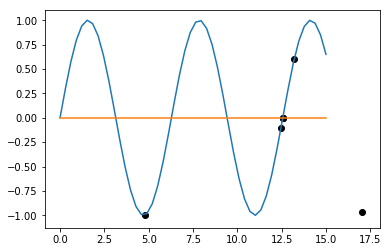

In [11]:
xs = np.linspace(0, 15)
sin = np.sin(xs)

plt.plot(xs, sin)
plt.plot(xs, np.zeros_like(xs))
plt.scatter(history, np.sin(np.array(history)), c='black')

# Roots of polynomials

$$f(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n$$ .

1. An $n$th order equation will have $n$ roots, not necessarily different.
2. If n is odd, there is at least one real root.
3. If there are any complex roots, they come in conjugate pairs: $\lambda + \mu i$, $\lambda - \mu i$

Newton-Raphson can be used to find roots of polynomials but it might be susceptible to convergence problems. For that reason, methods specific to the roots of polynomials have been developed, like Müller's and Bairstow's.

## Deflation 

Deflation is the process of eliminating already found roots of polynomials in order not to find them again. We just do this by dividing by $(x-r)$.


## Root polishing

Consists of taking the solutions found during deflation as initial estimates, and then going back to the original polynomial and determining each again.

We might have problems if there are two or more roots that are so close that they converge on the same undeflated root.

## `polyroot`

See [numpy polyroot](https://docs.scipy.org/doc/numpy-1.15.4/reference/generated/numpy.polynomial.polynomial.polyroots.html) for more details.


In [34]:
import numpy.polynomial.polynomial as poly

poly.polyroots([6, -5, 1])

array([2., 3.])

In [13]:
poly.polyfromroots([2,3])

array([ 6., -5.,  1.])

# Problems

#### Exercise

Use Newton-Raphson to find the positive real root of

$$f(x) = x^3 + x^2 -4x -4$$

Plot the functions, and compare the roots to those returned by polyroot.

In [45]:
def f(x):
    return x ** 3 + x **2 - 4*x -4

def f_prime(x):
    return 3 * x ** 2 + 2 * x - 4

solution, history = newton_raphson(f, f_prime, x_0 = 1)
solution, poly.polyroots([-4, -4, 1, 1])

(2.0000000000356346, array([-2., -1.,  2.]))

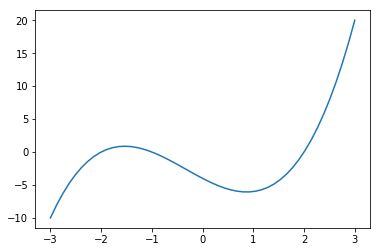

In [47]:
xs = np.linspace(-3, 3)
plt.plot(xs, f(xs))

#### Exercise

Remember that the velocity v of a falling parachutist is given by

$$v = \frac{gm}{c} (1 - e^{-(c/m)t})$$

where $g = 9.8 m/s^2$. For a parachutist with a drag coefficient $c = 15 kg/s$, compute the mass $m$ so that velocity is $v = 35 m/s$ at $t = 9s$. Use any method to determine m to a level of $\epsilon_s = 0.1%$.

#### Use bisection to determine the drag coefficient needed so that

Use bisection to determine the drag coefficient needed so that an 80-kg parachutist has a velocity of 36 m/s after 4 s of free fall. Start with initial guesses of $x_l = 0.1$ and $x_u = 0.2$ and iterate until the approximate relative error falls below 2%.

#### Exercise

Determine the lowest real root of f(x) = –12 − 21x + 18x 2 − 2.4x 3:

* Graphically 
* Using Newton-Raphson to a value of $\epsilon_s$ corresponding to three significant figures.

# Further Reading
[Muller's method]

[Bairstow's method]

[Muller's method]: https://en.wikipedia.org/wiki/Muller%27s_method
[Bairstow's method]: https://en.wikipedia.org/wiki/Bairstow%27s_method